#### **LOGISTIC REGRESSION**

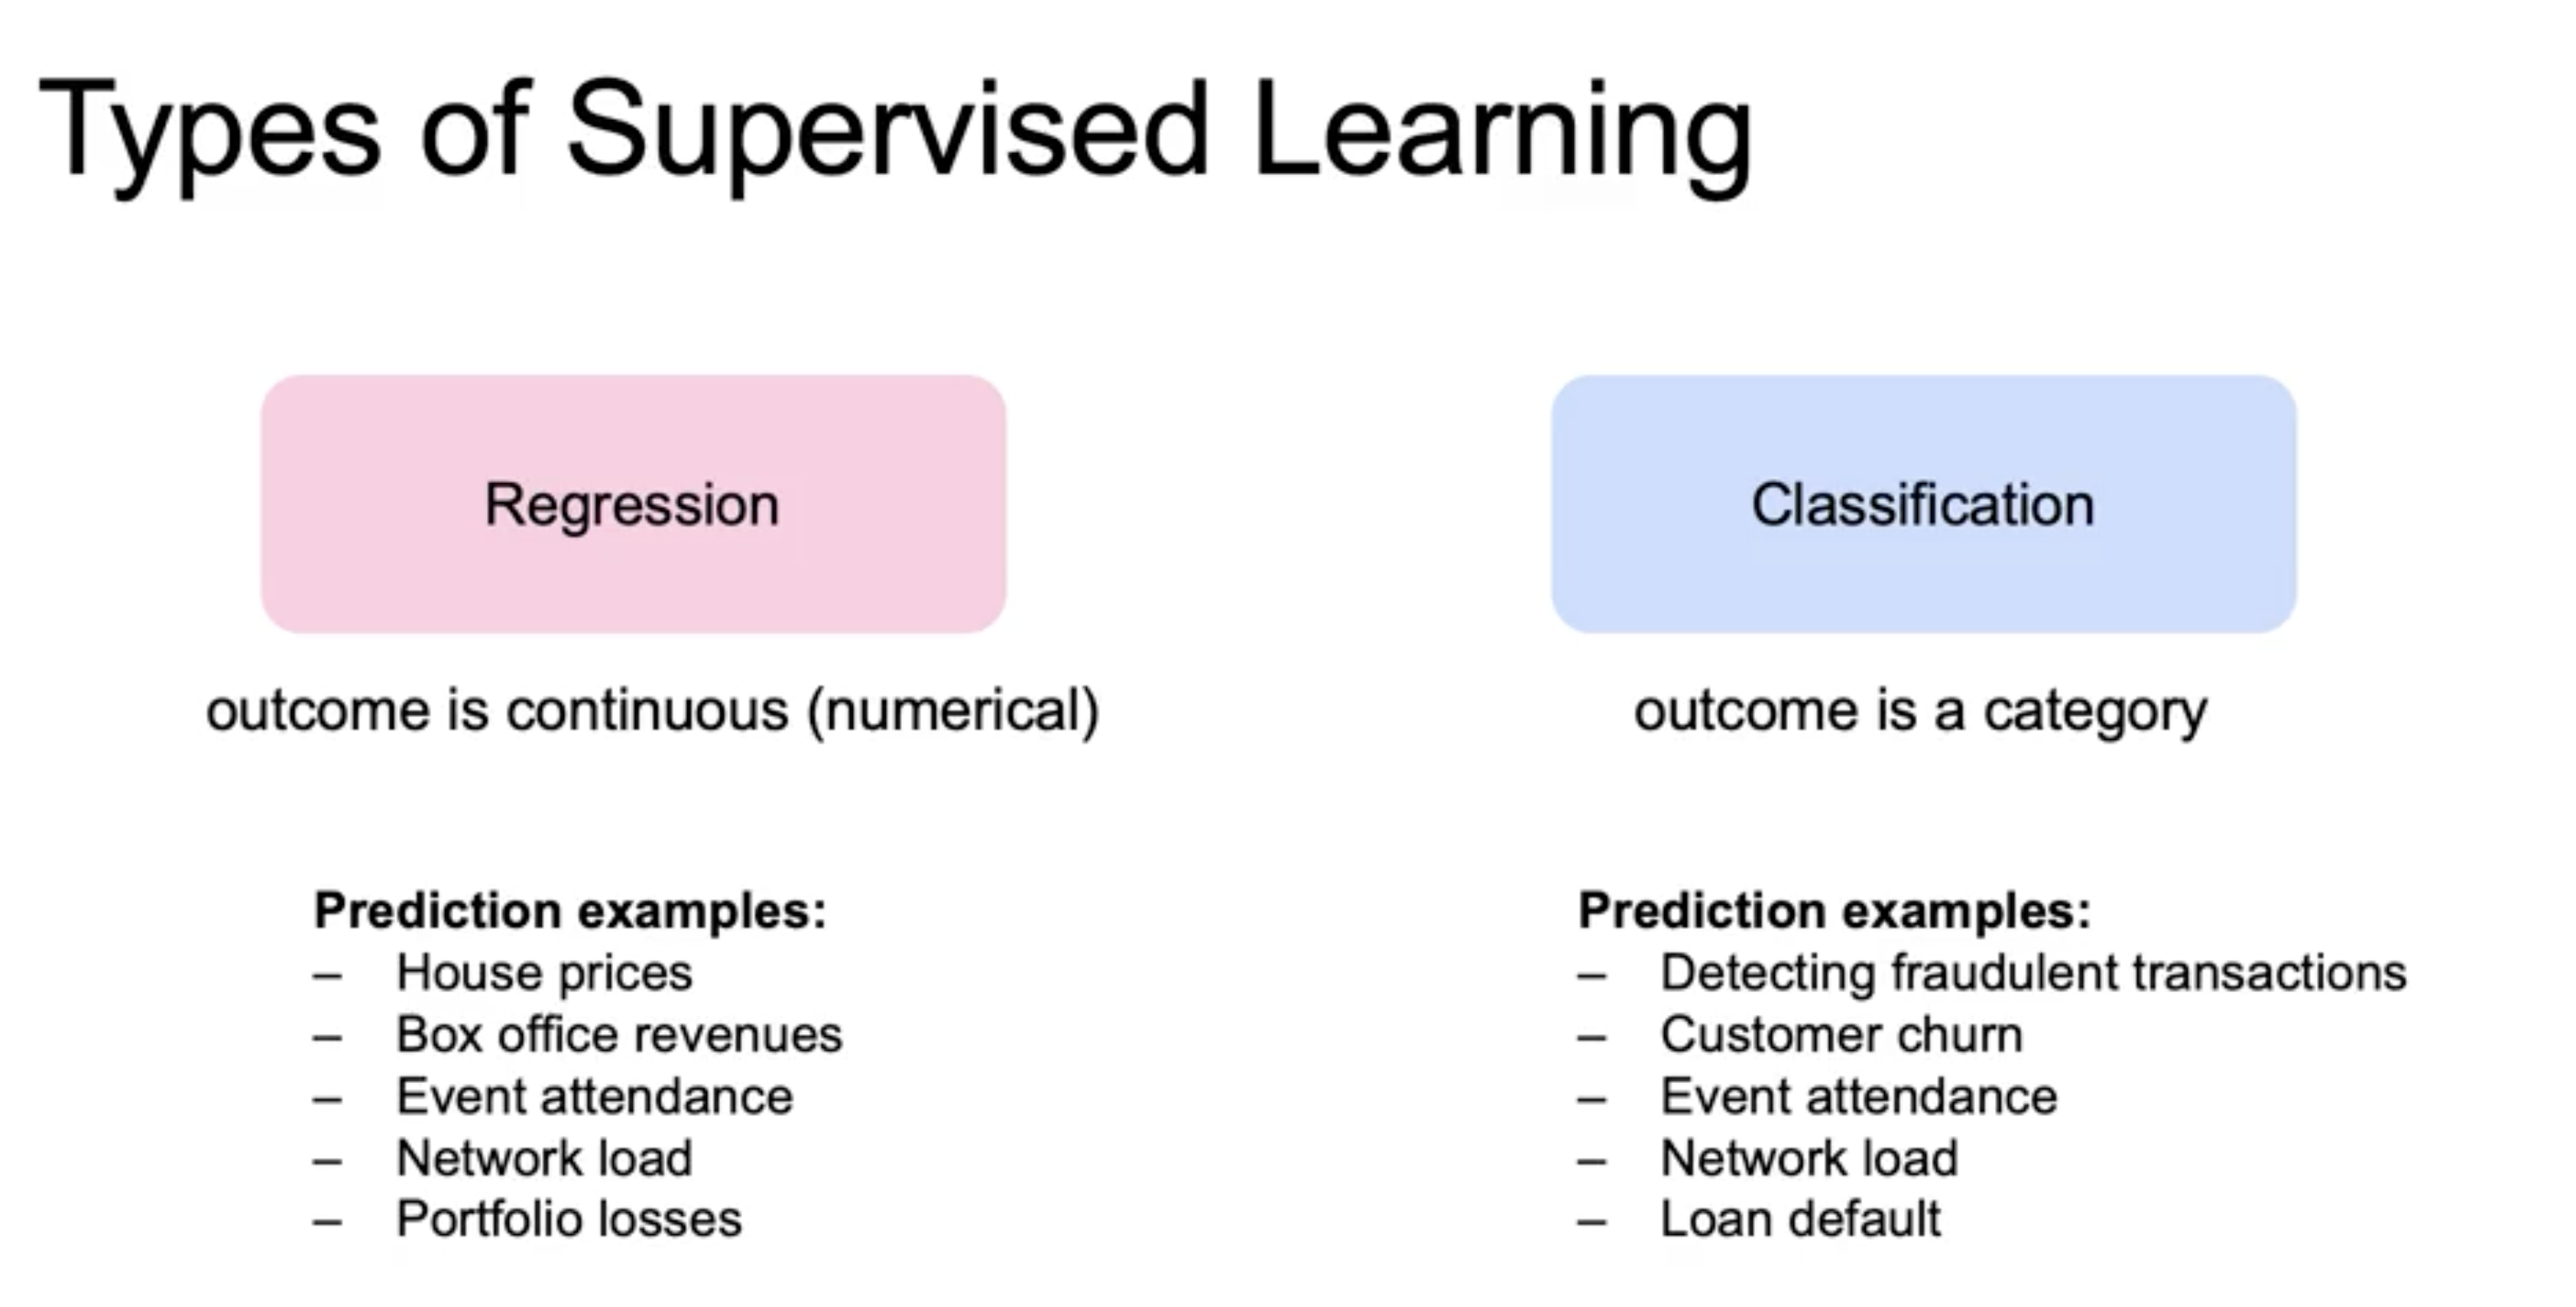

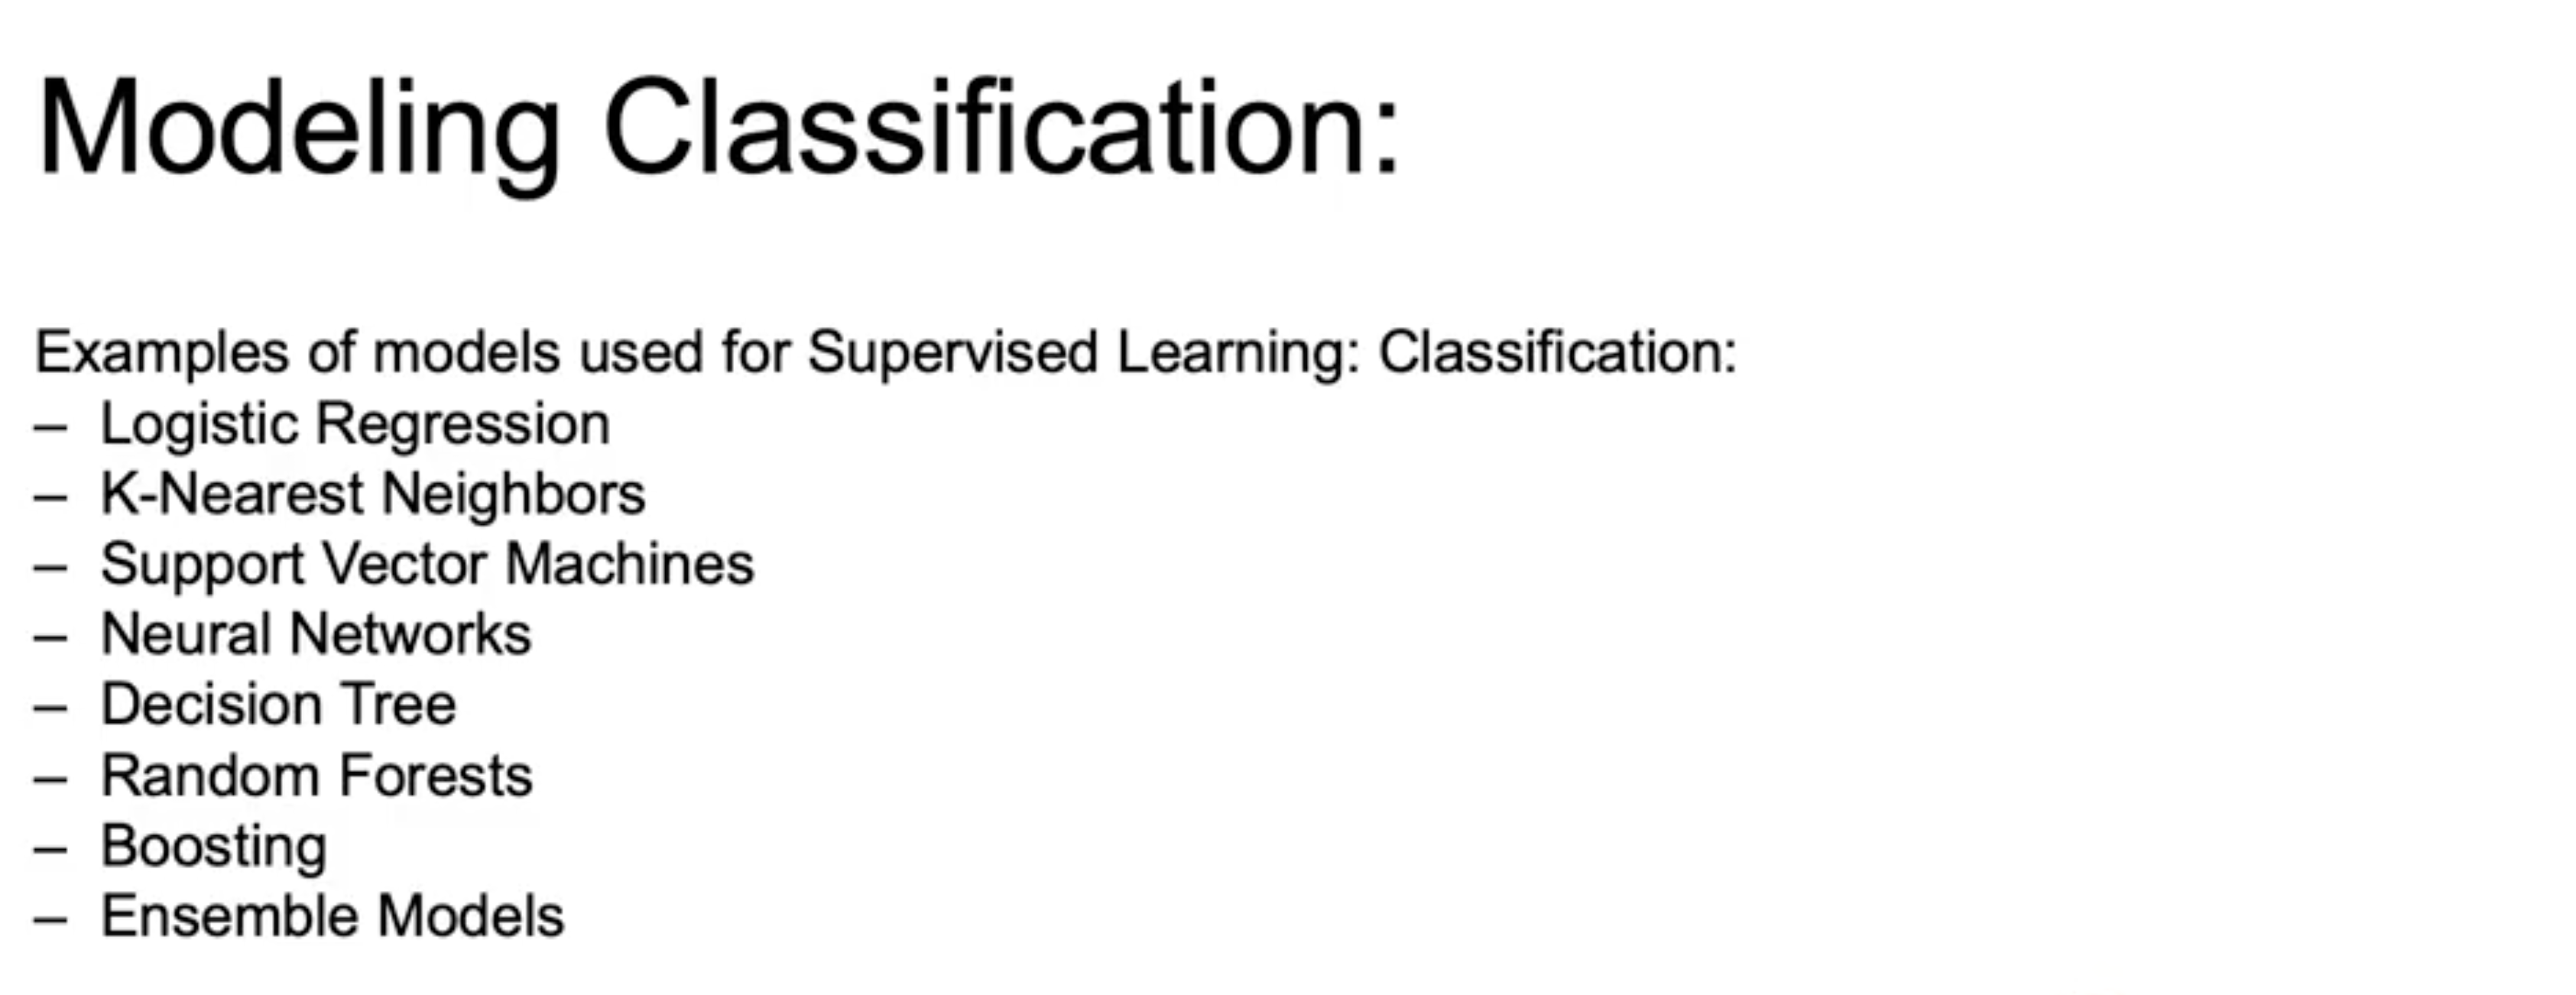

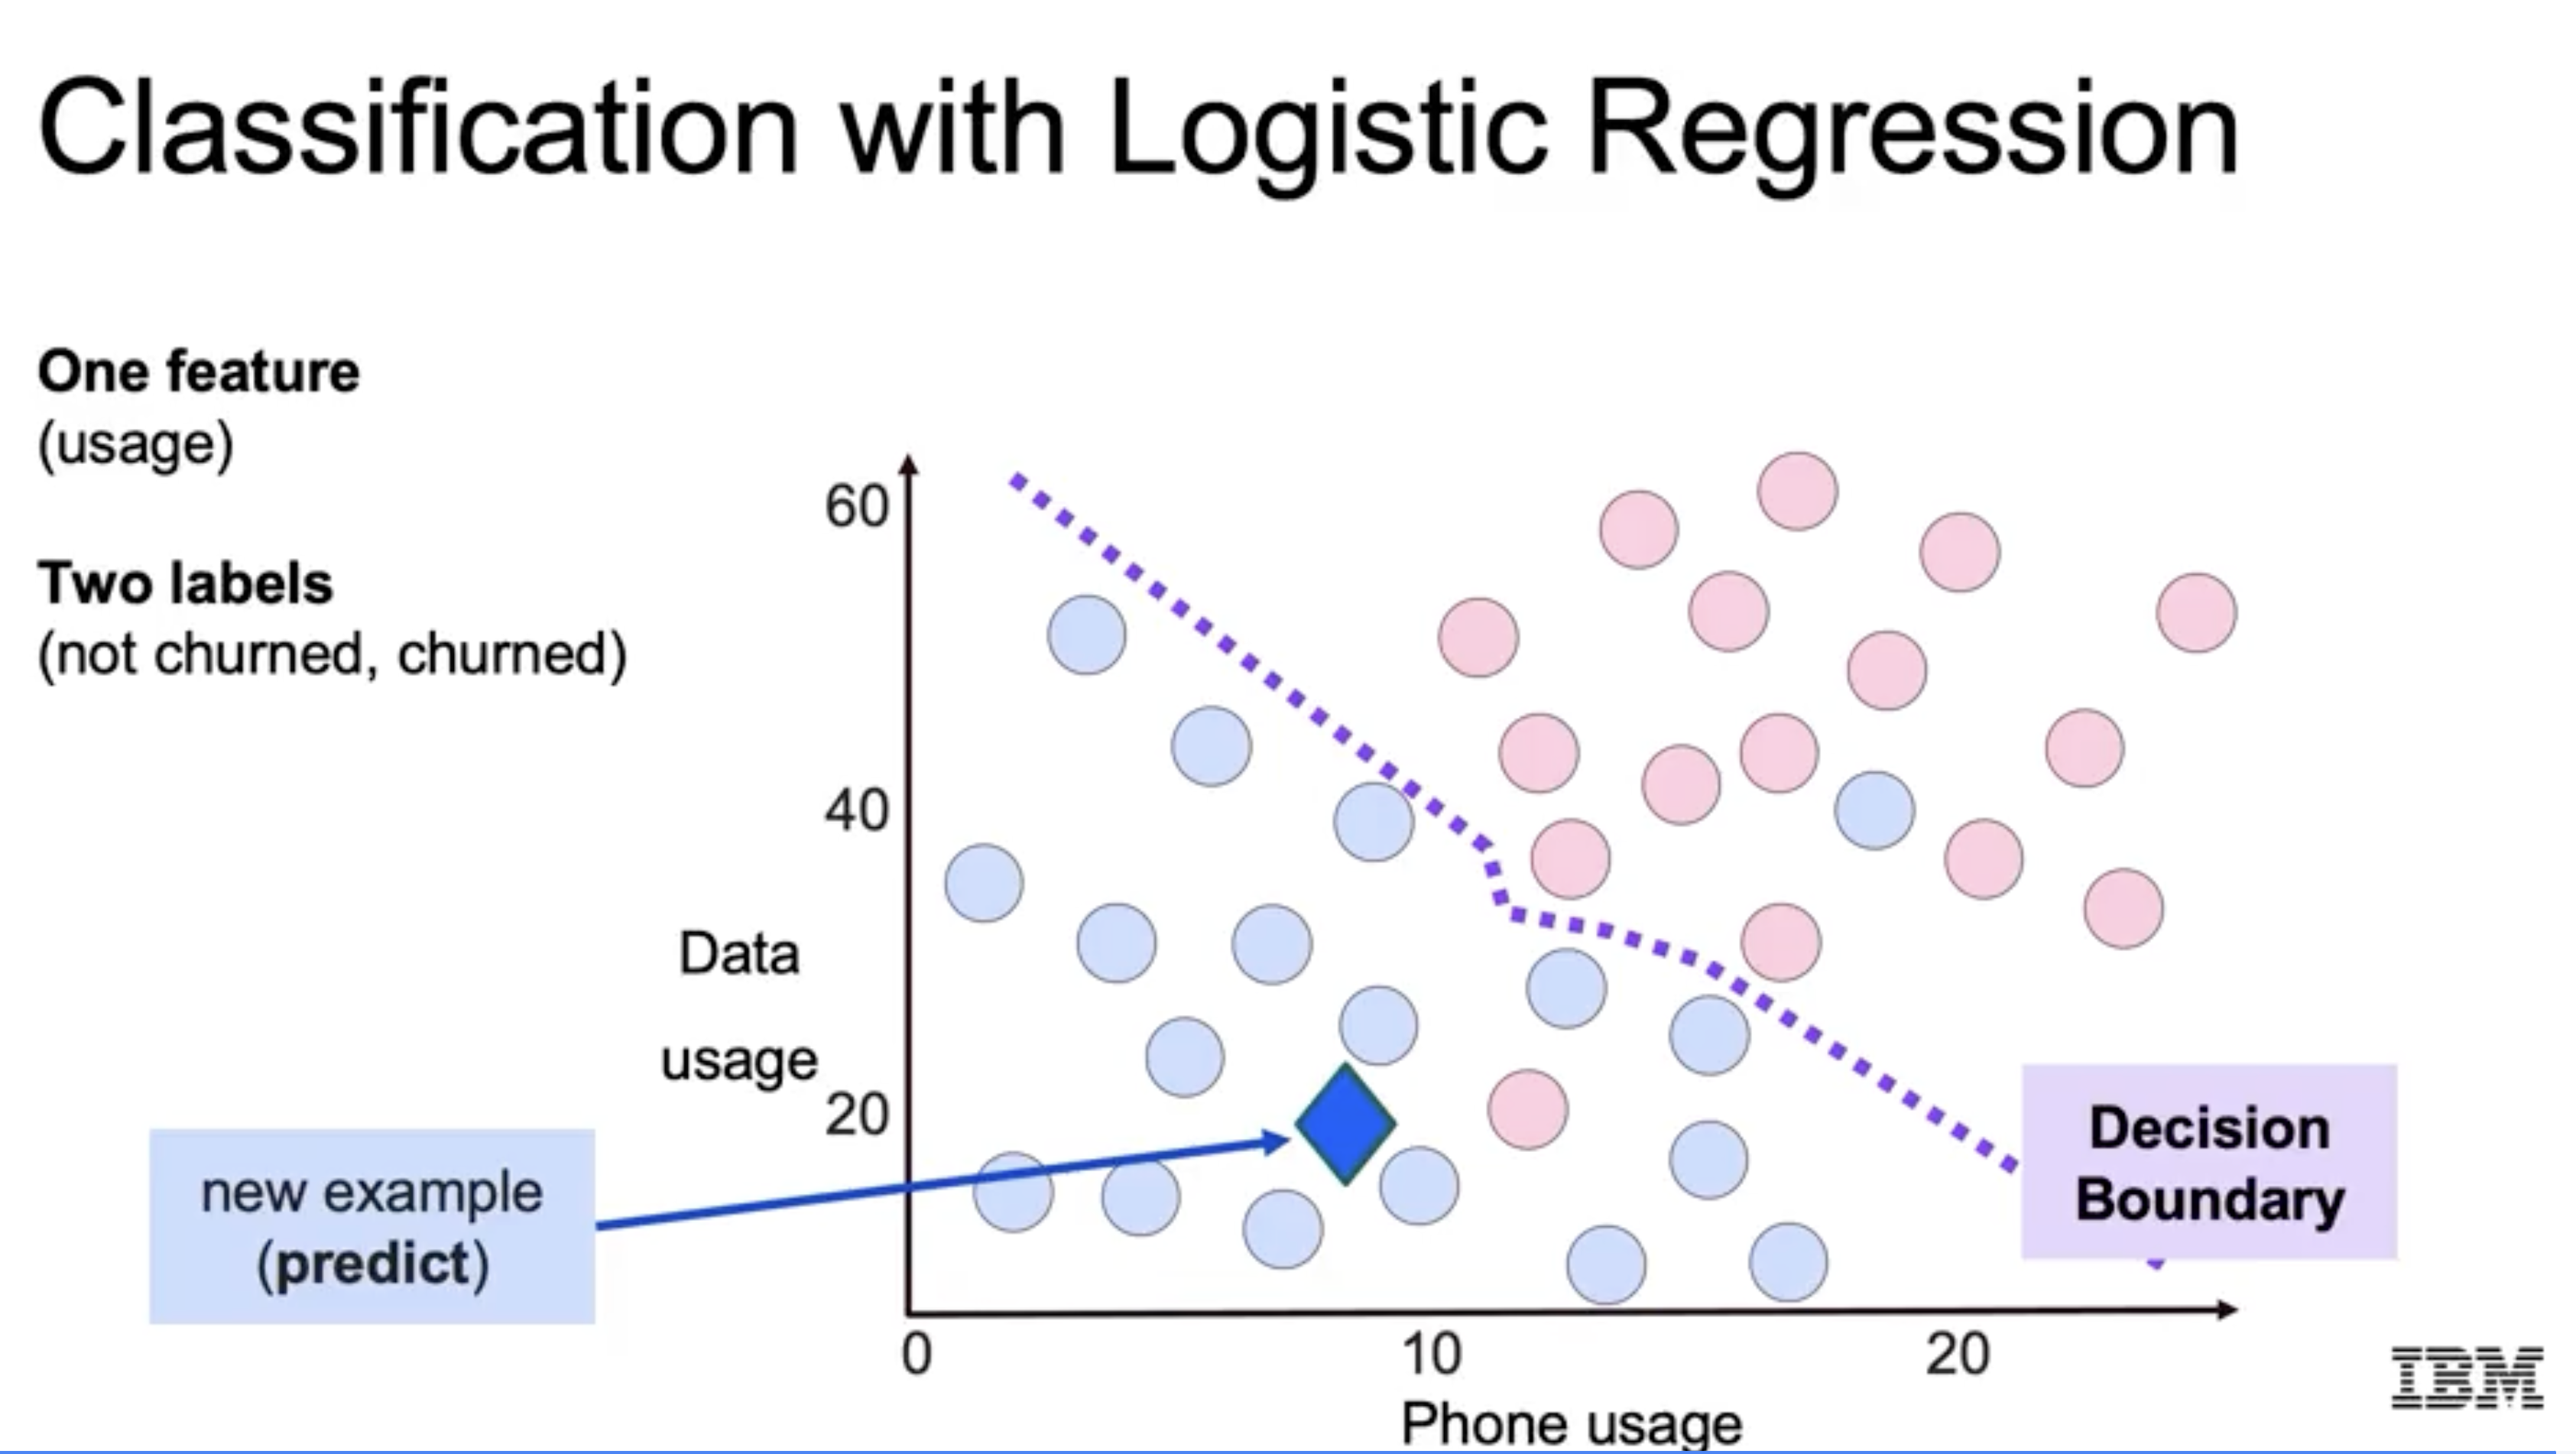

In [8]:
from IPython.display import Image, display

display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/classification_1.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/classification_2.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/classification_3.png"))

##### **THE SYNTAX**

In [ ]:
# import classification method
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create an instance of the class
LR = LogisticRegression(penalty='l2', C=10.0) # Regularization parameters (higher C means less penalty)

# Fit the instance on the data and then predict the expected value
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

# view the output fitted coefficients
LR.coef_

# Tune regularization parameters with cross-validation
LogisticRegressionCV

### CONFUSION MATRIX AND ACCURACY-SPECIFICITY-PRECISION-RECALL

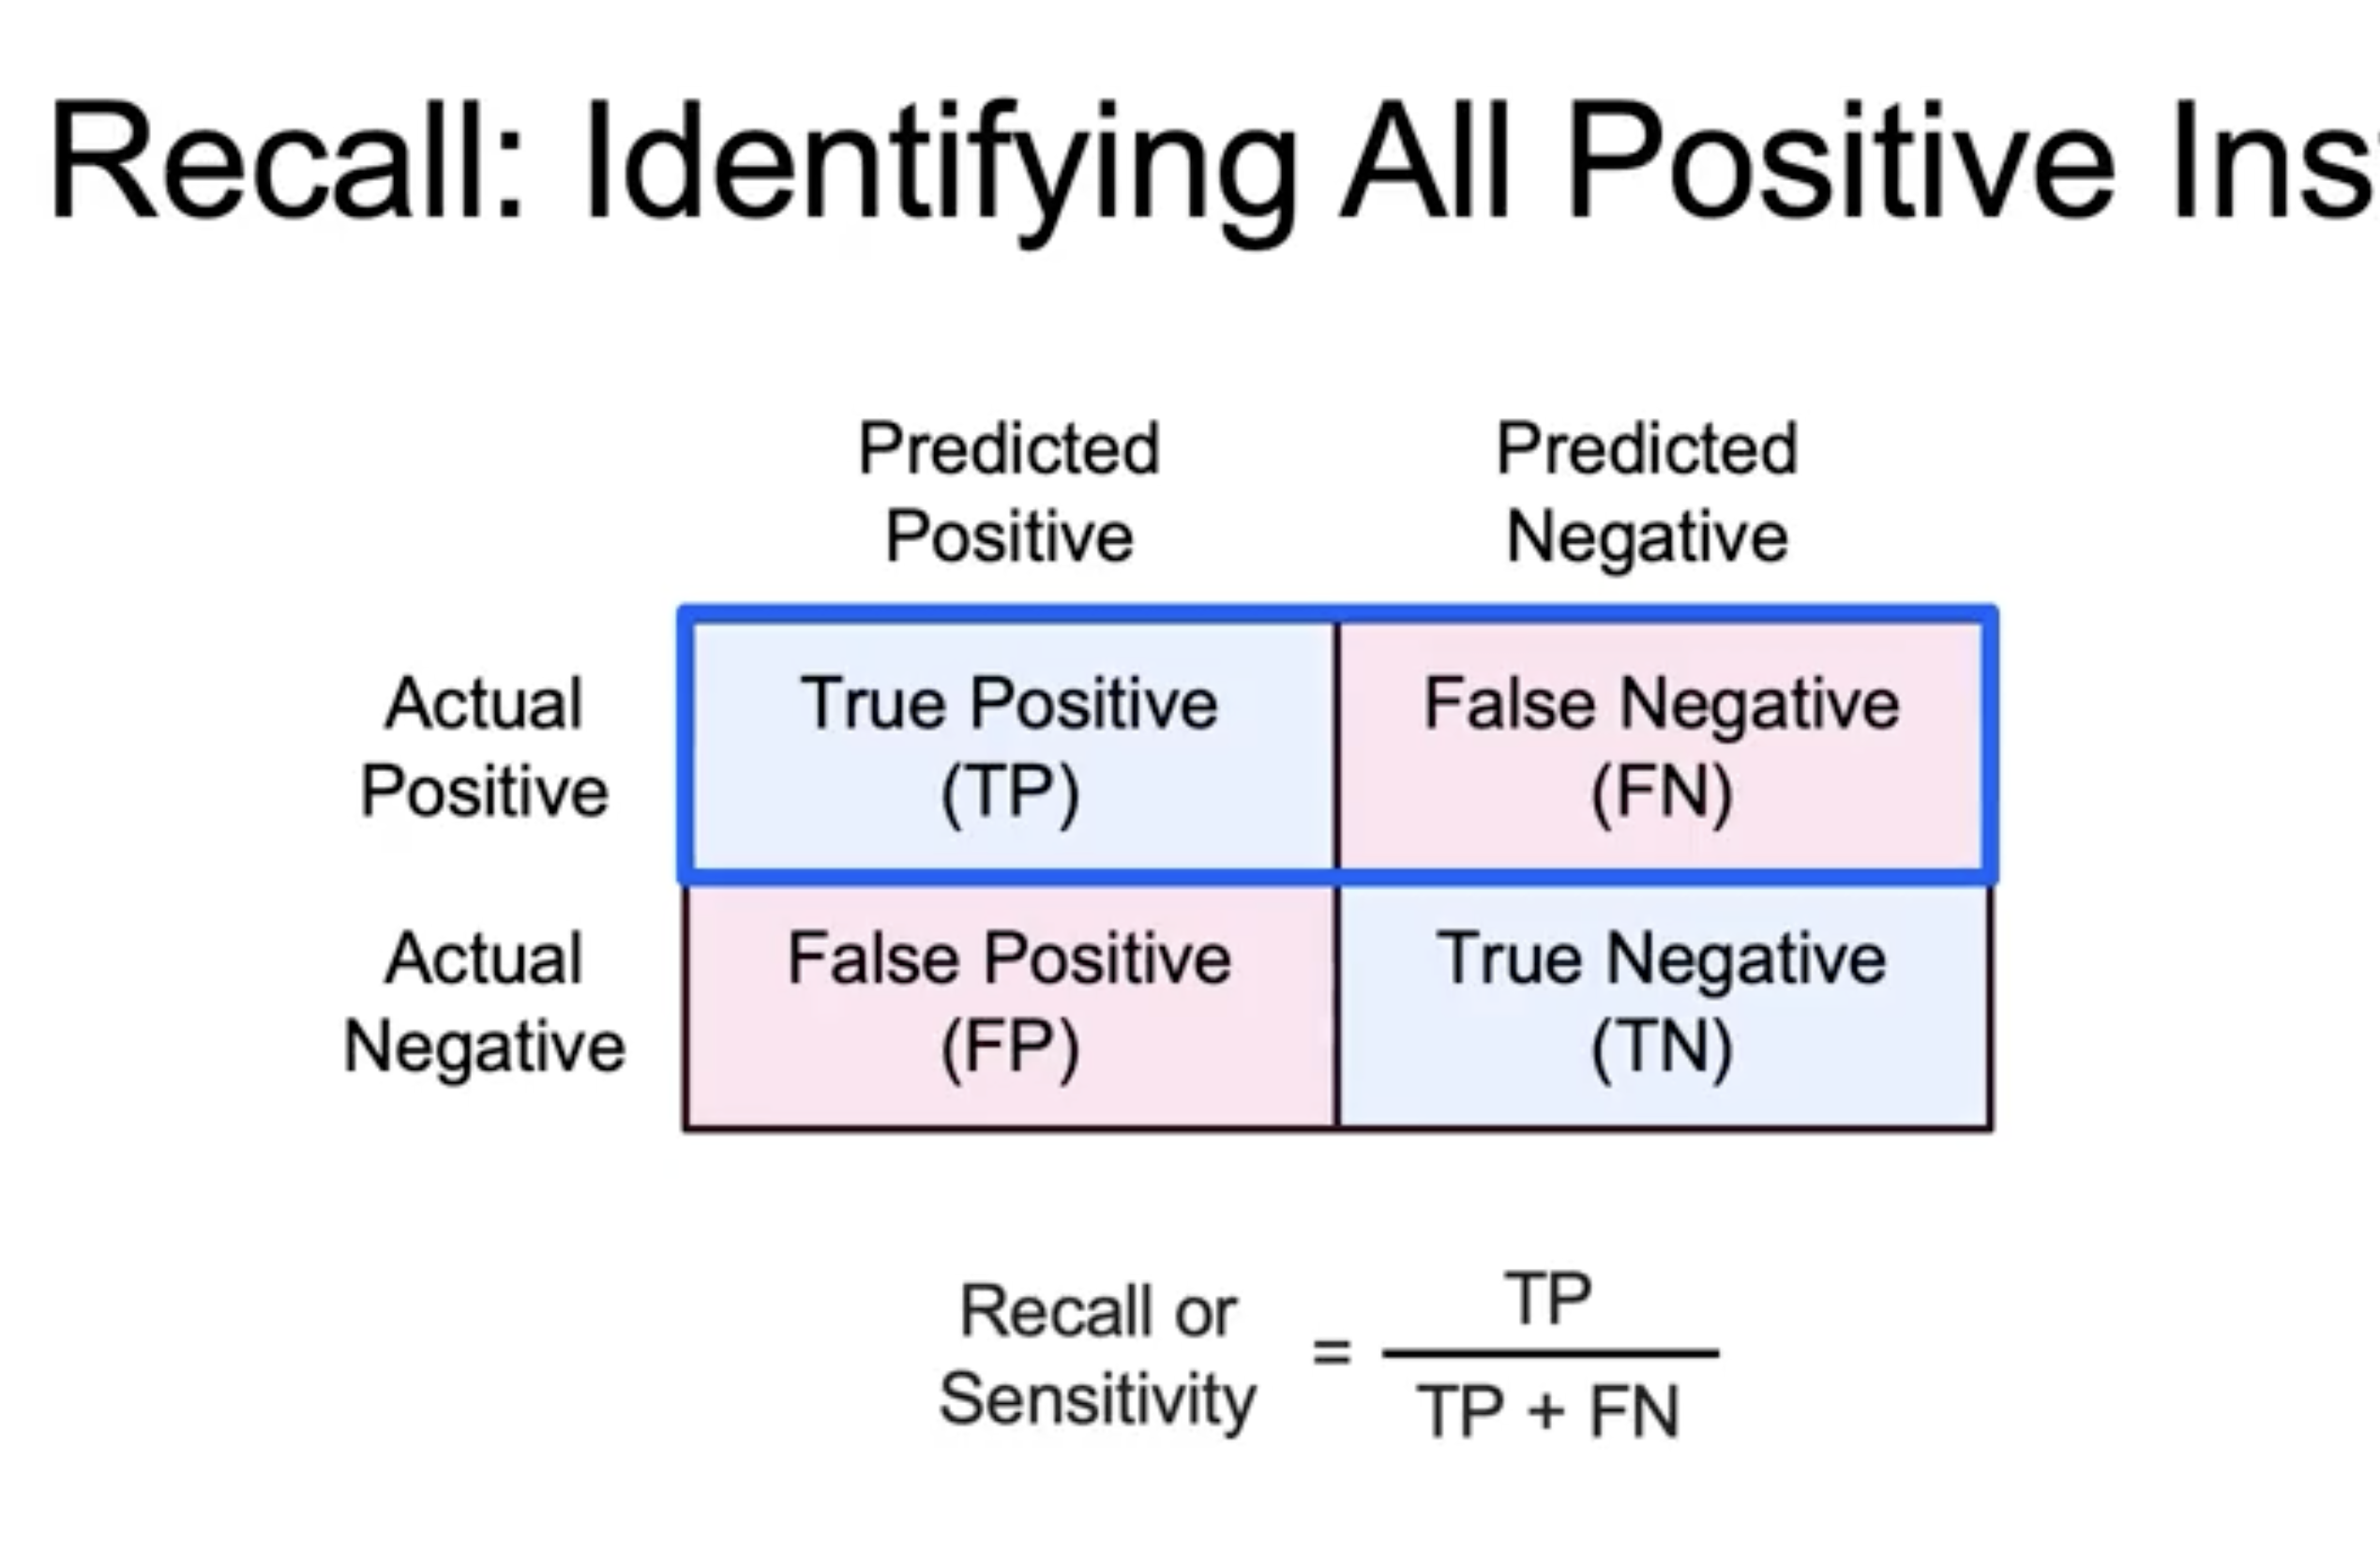

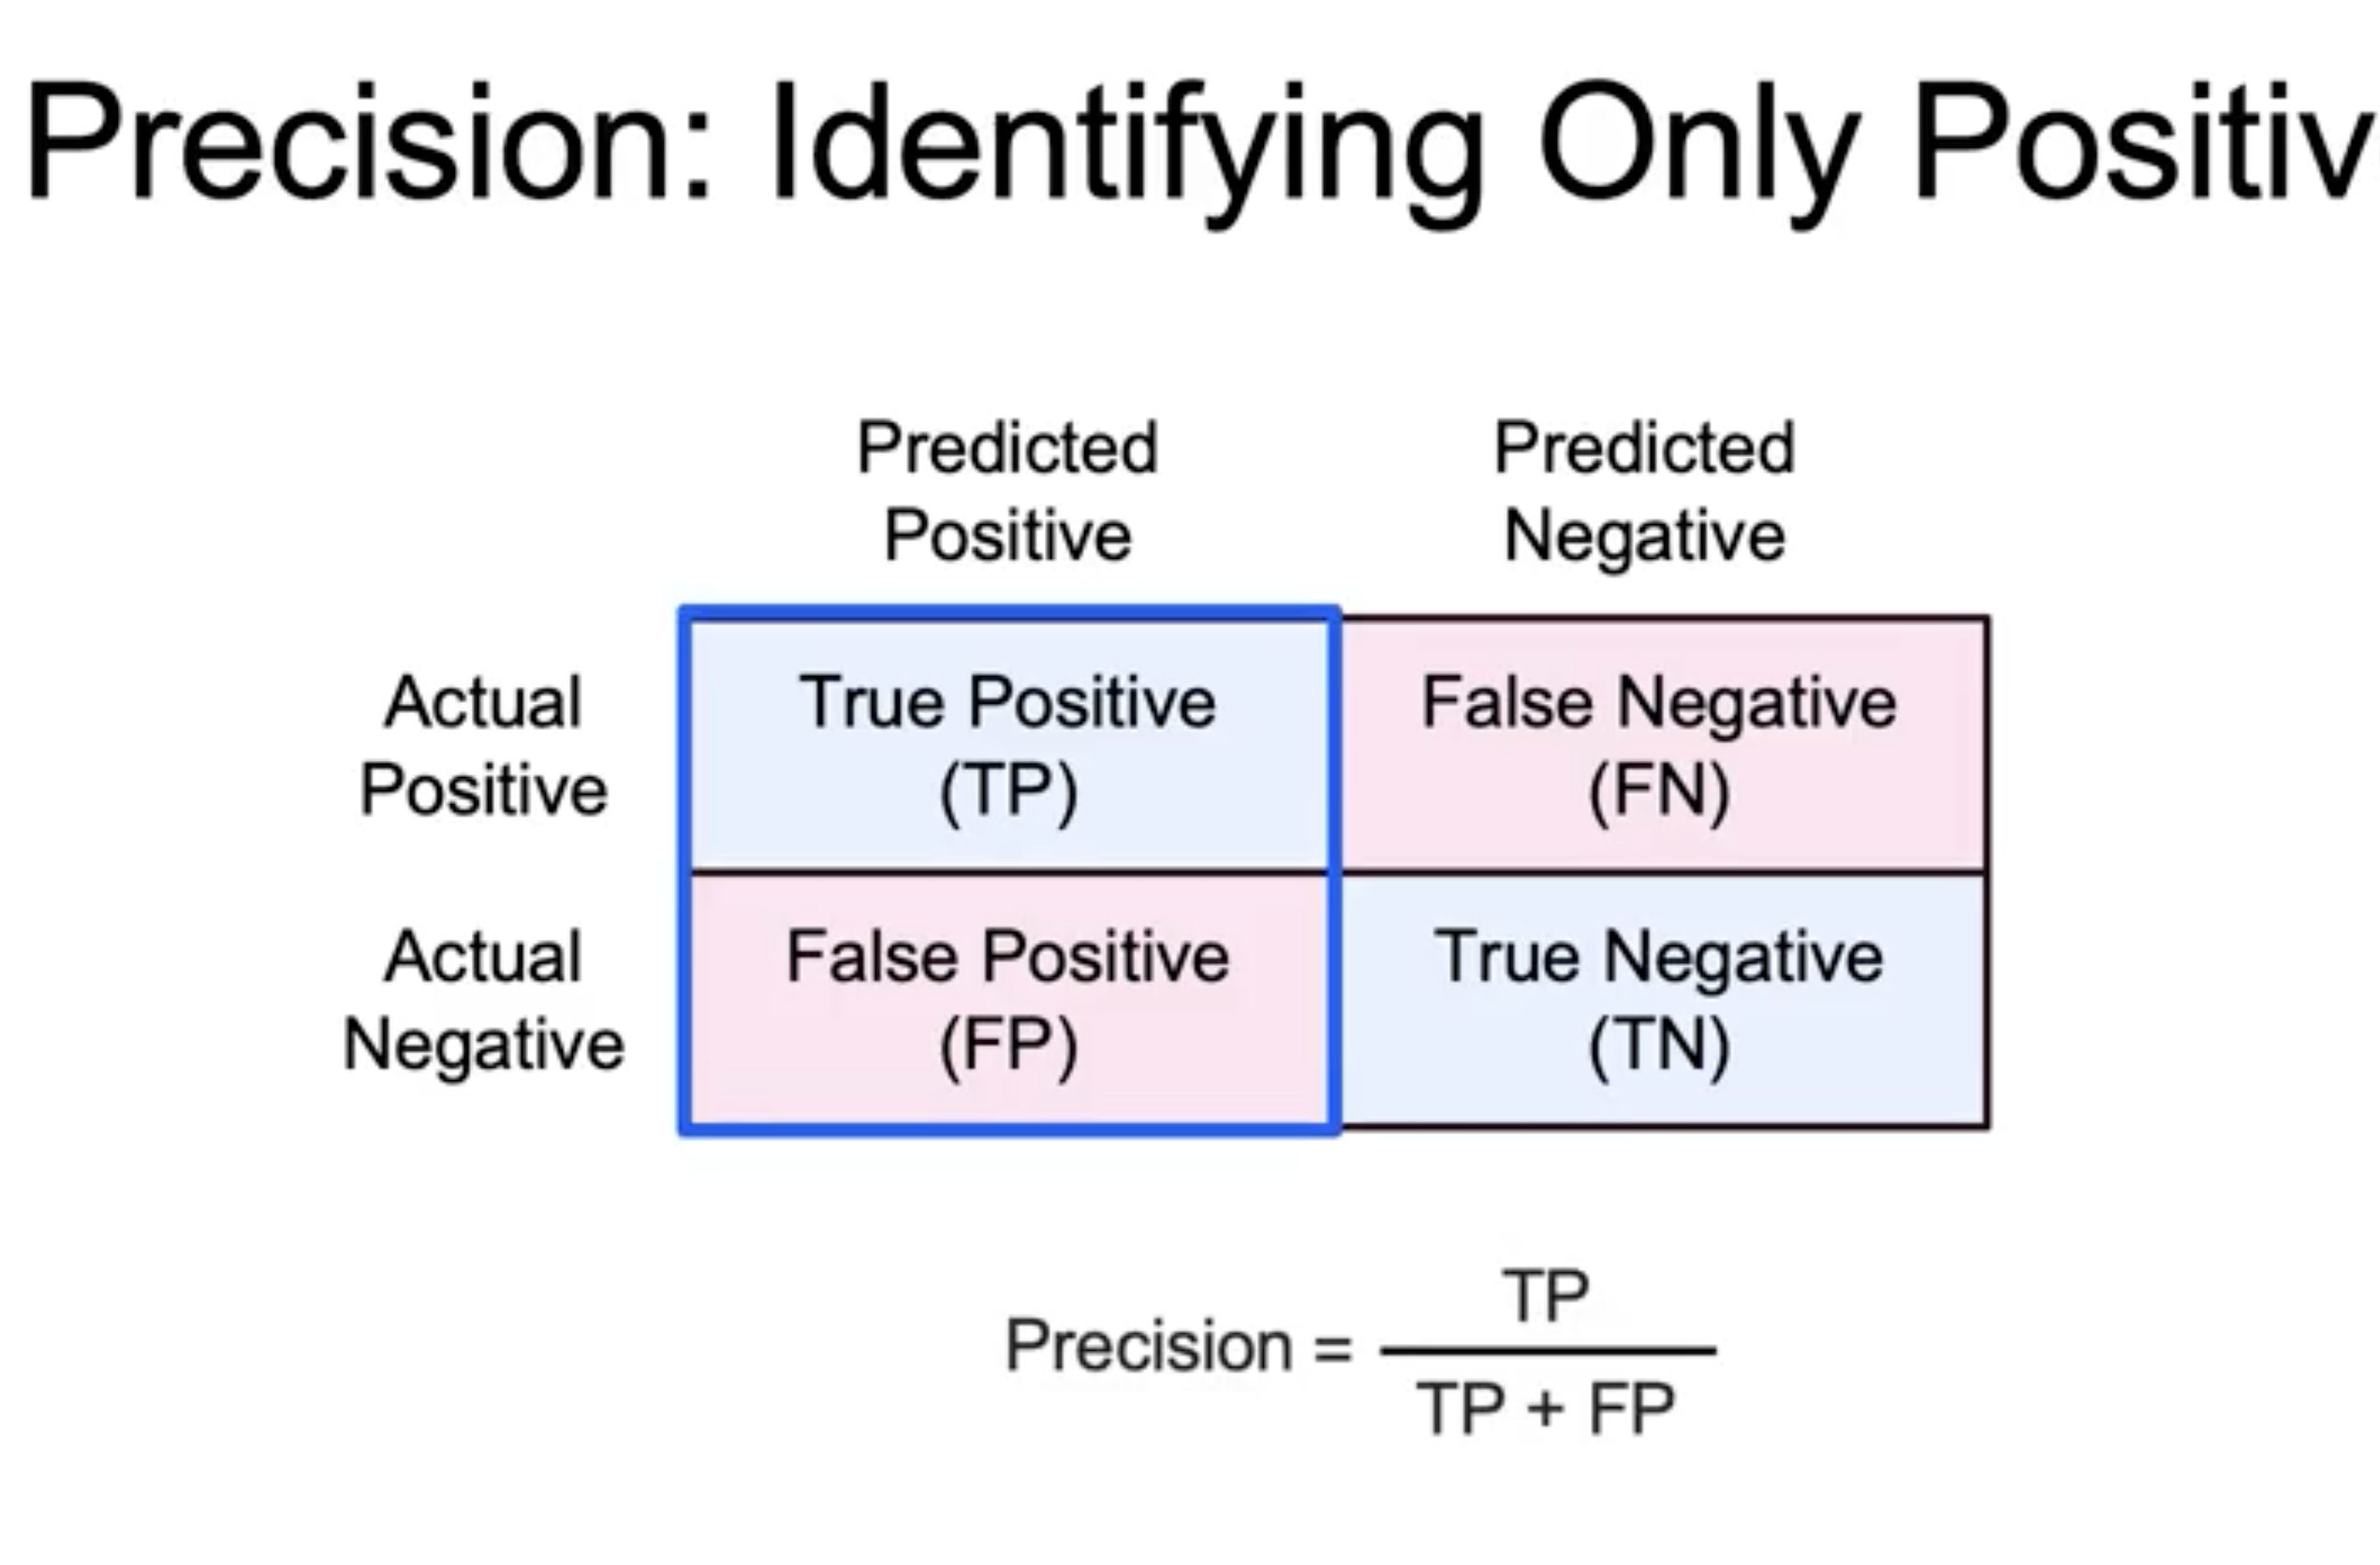

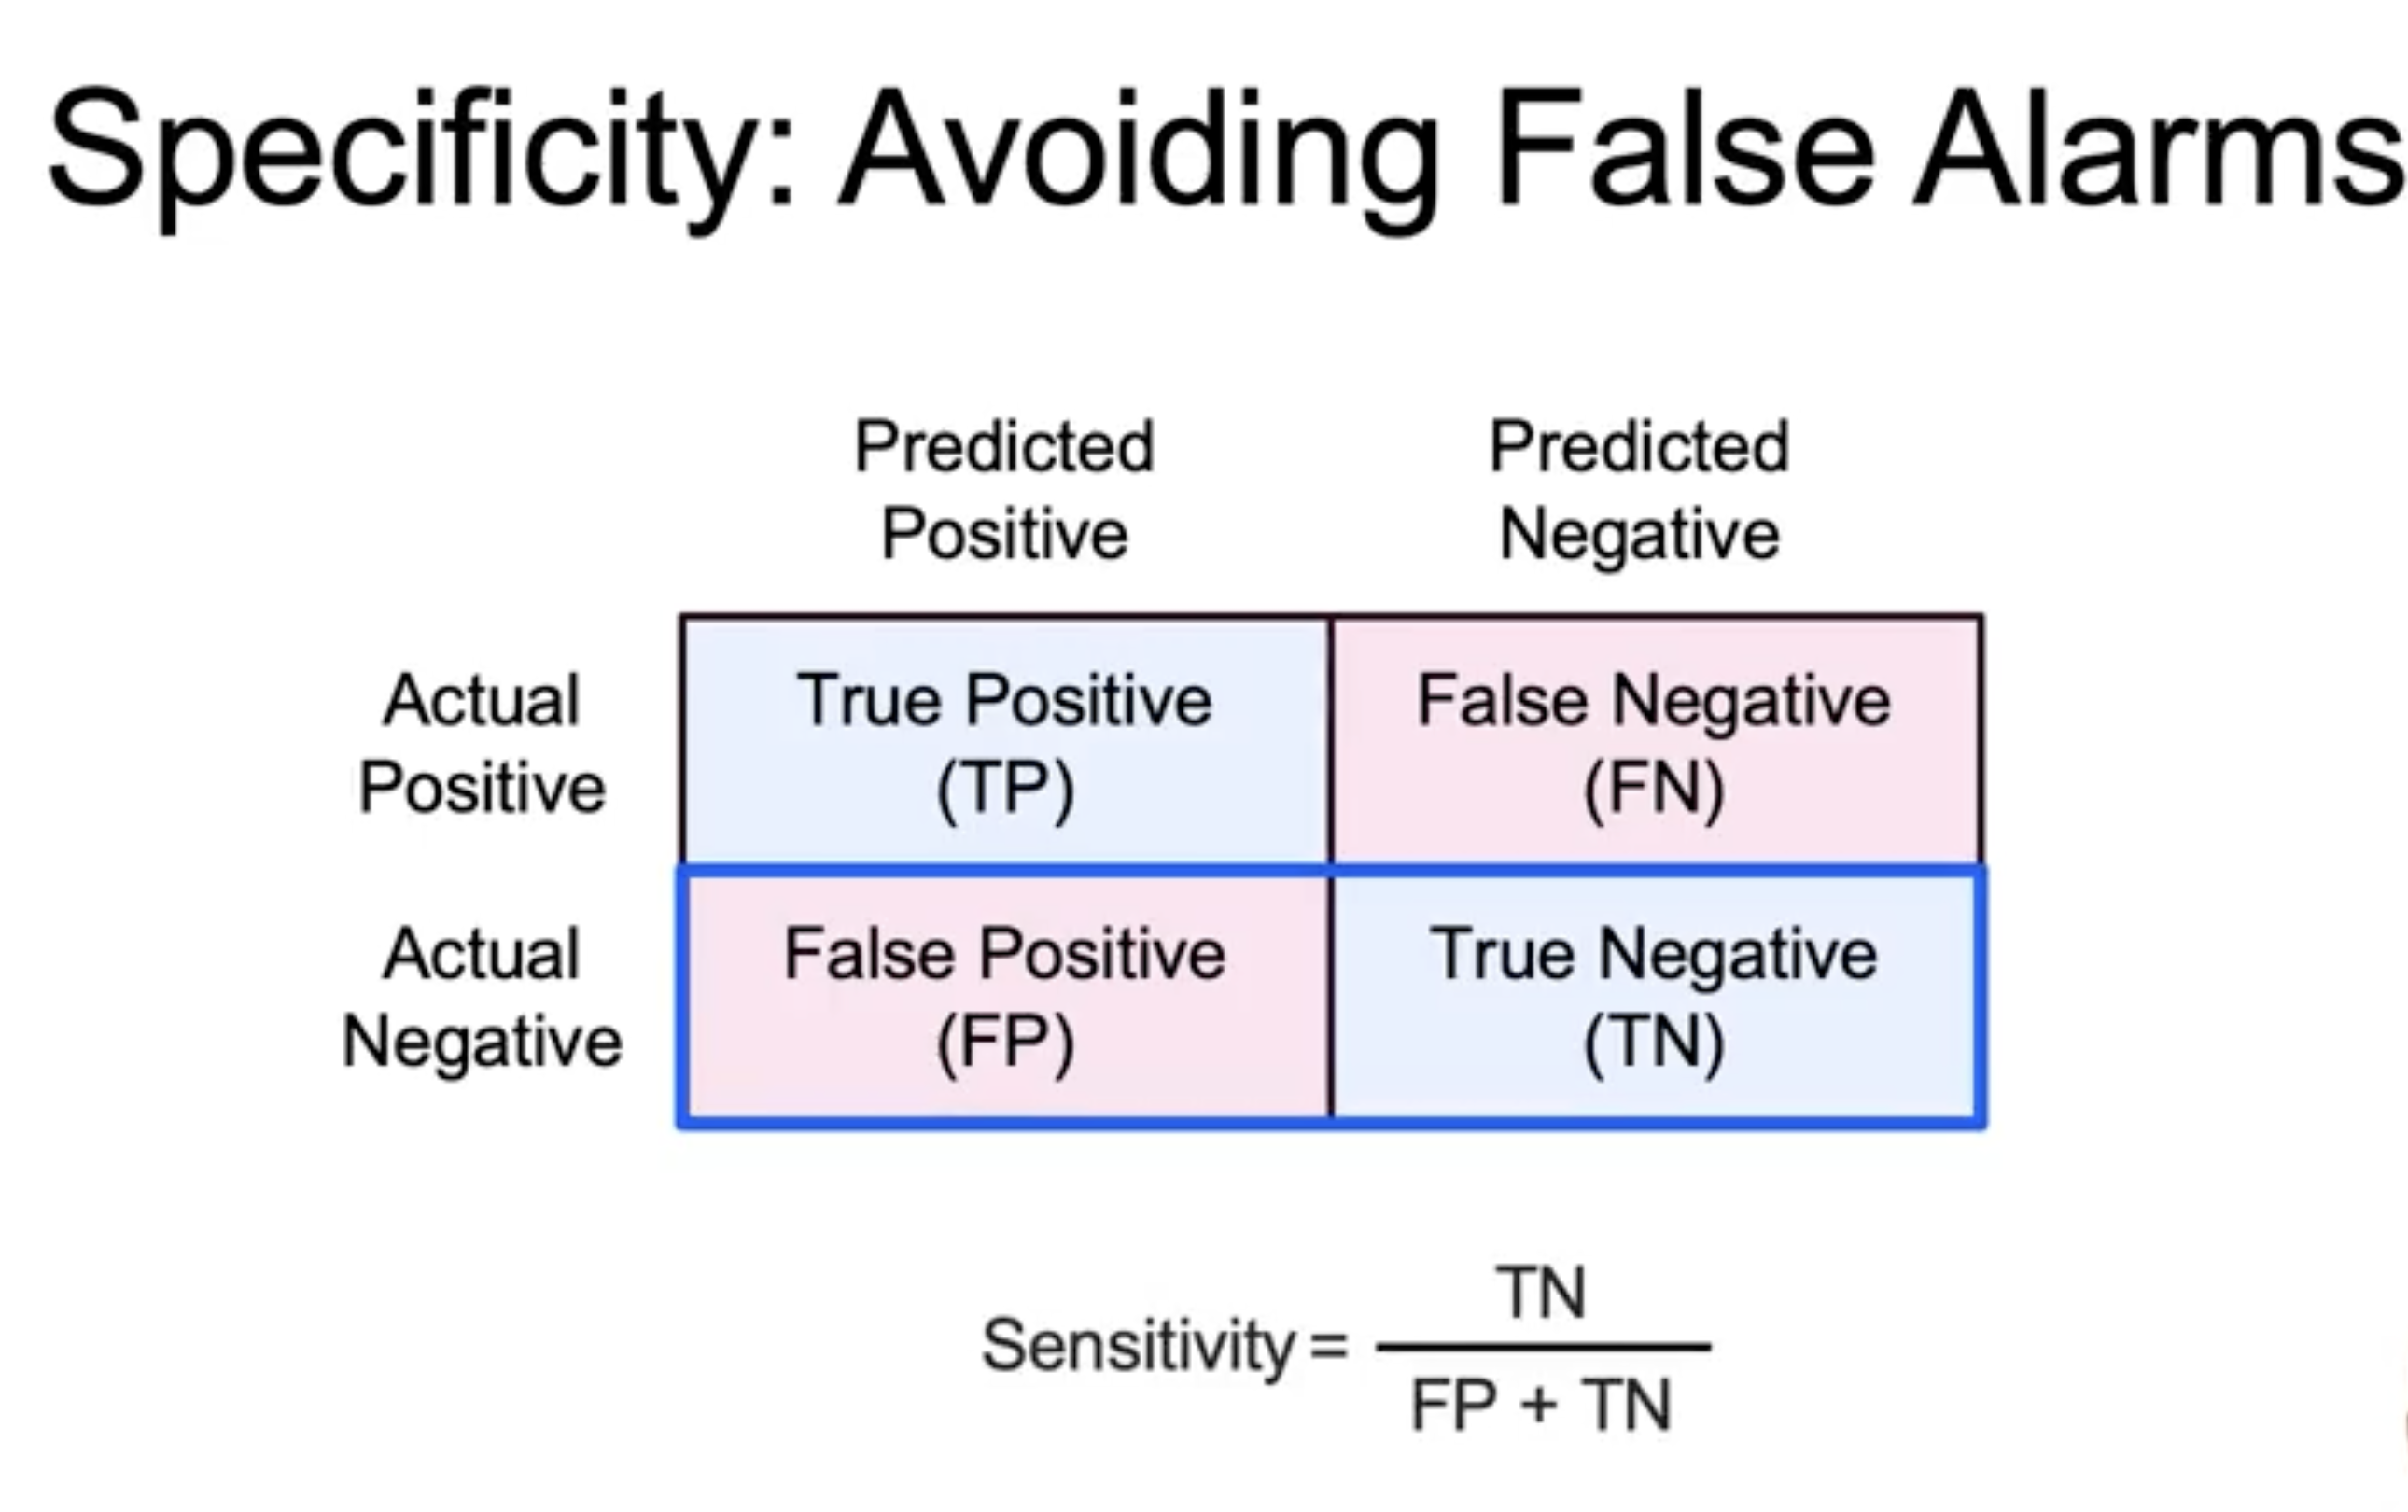

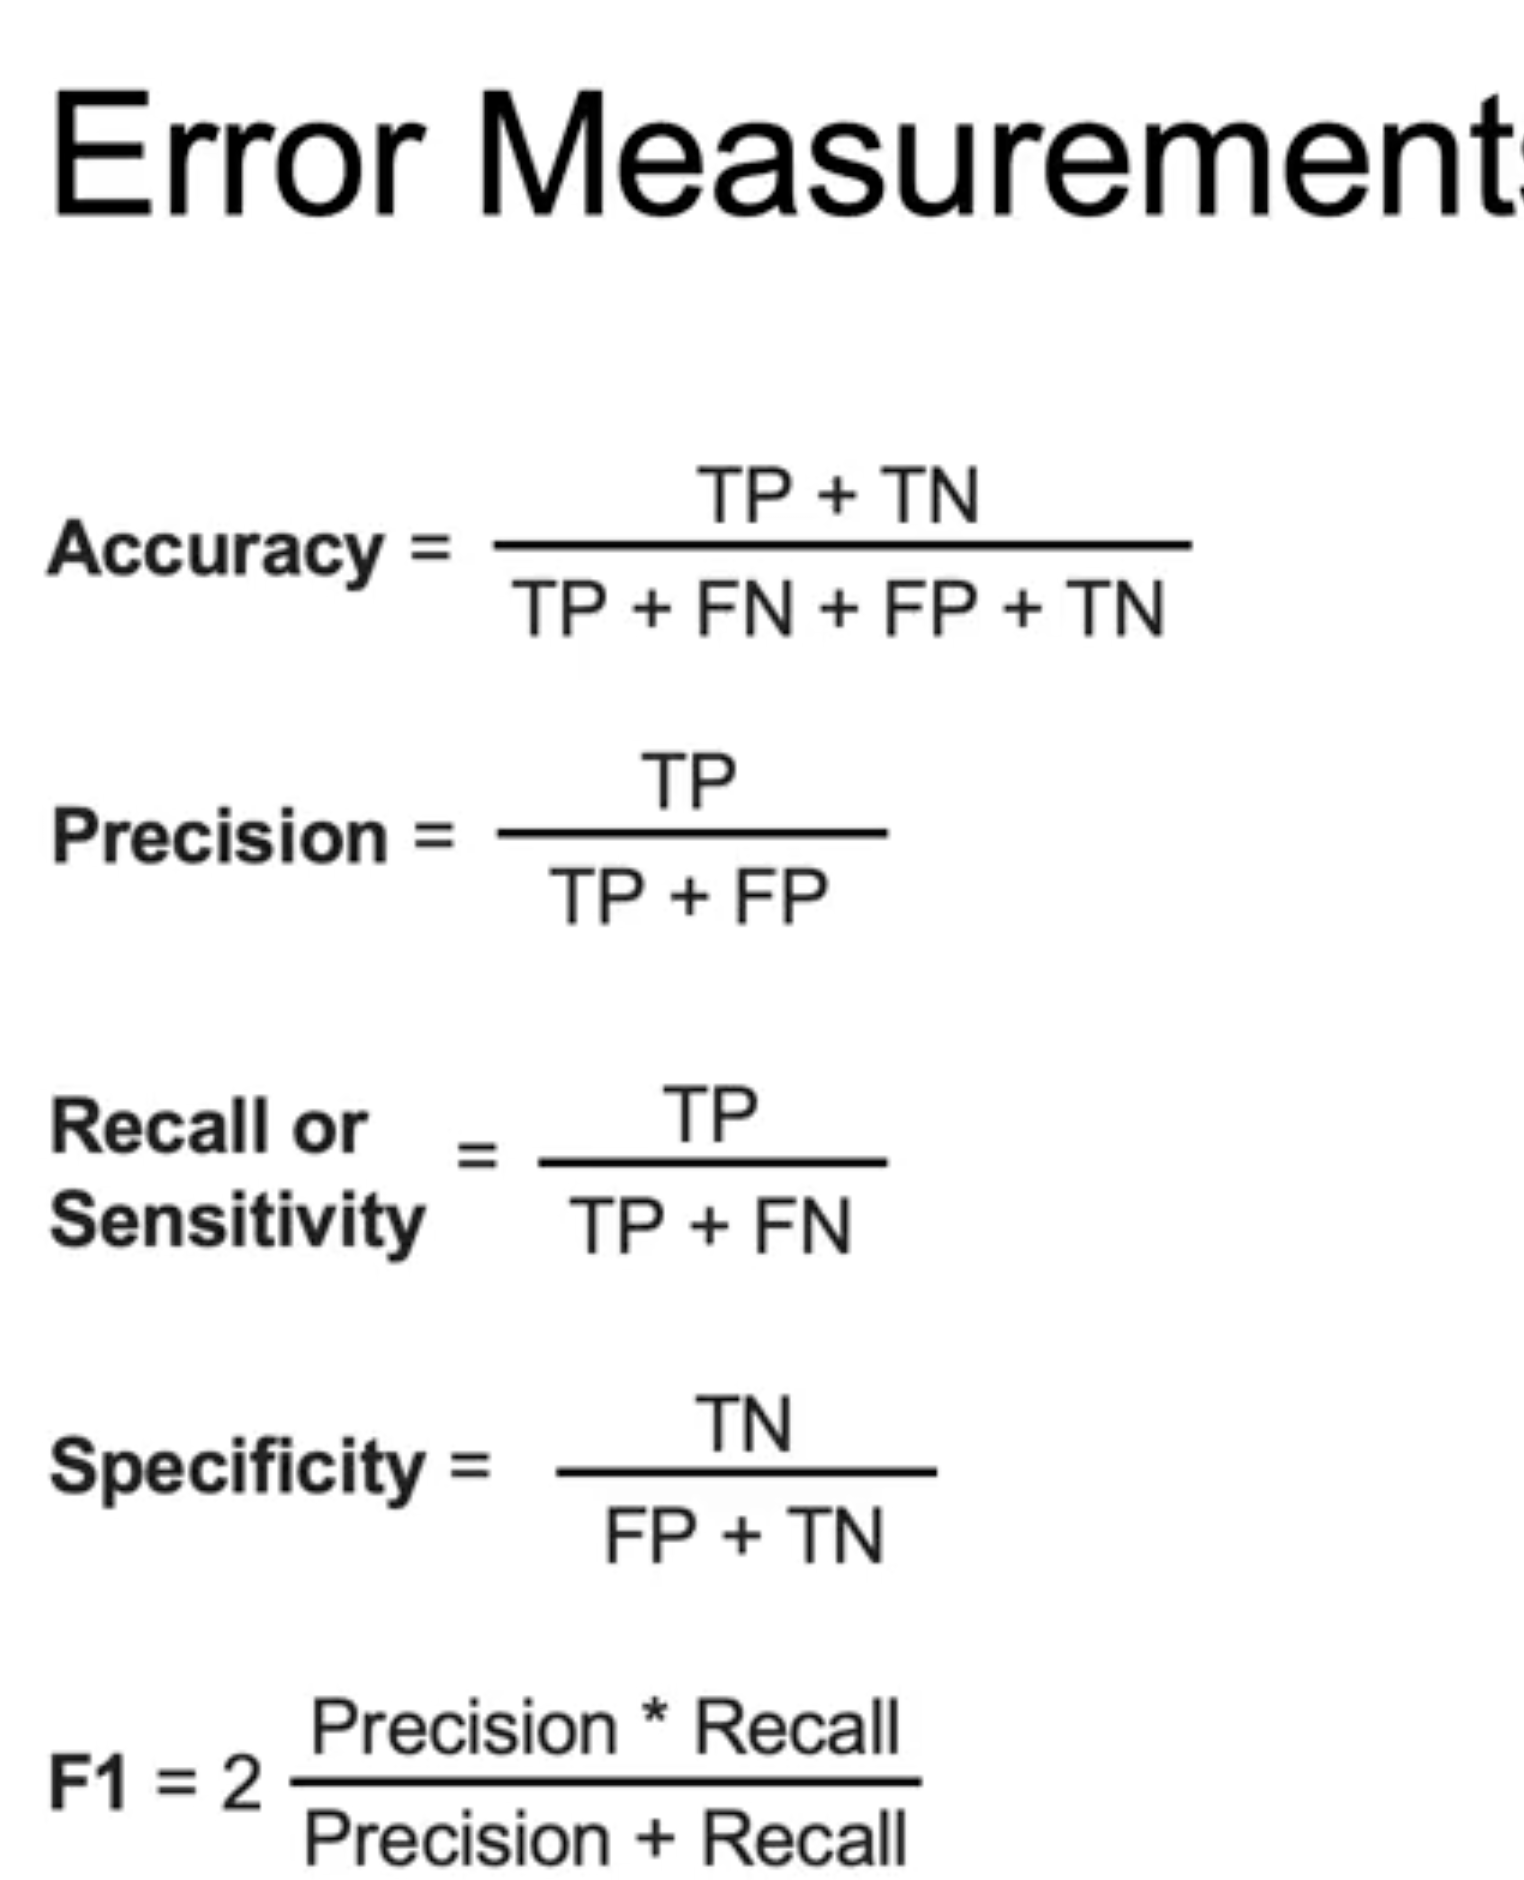

In [20]:
from IPython.display import Image, display

display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/confusion_1.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/confusion_2.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/confusion_3.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/confusion_4.png"))

#### CLASSIFICATION ERRROR METRICS

In [ ]:
# import the desired error function
from sklearn.metrics import accuracy_score

# calculate the error on the test and predicted data sets
accuracy_value = accuracy_score(y_test, y_pred)

# lots of other error metrics and diasgnostic tools:
from sklearn.metrics import precision_score, recall_score,f1_score, roc_auc_score,
                            confusion_matrix, roc_curve,
                            precision_recall_curve

#### **EXAMPLE**

In [23]:
%pip install seaborn  
%pip install pandas
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [25]:
import pandas as pd, seaborn as sns, numpy as np

In [26]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [27]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [28]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [33]:
# The data are all scaled from -1 (minimum) to 1.0 (maximum).

data.iloc[:,:-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [34]:
data.iloc[:,:-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [35]:
# Examine the breakdown of activities; they are relatively balanced.

data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [39]:
data.Activity.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

1132     5
6491     1
10247    4
4261     0
383      1
Name: Activity, dtype: int64

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values.
* Identify those that are most correlated (either positively or negatively).

In [46]:
# calculate the correlation values
features_cols = data.columns[:-1]
corr_values = data[features_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [47]:
# A histogram of the absolute value correlations.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

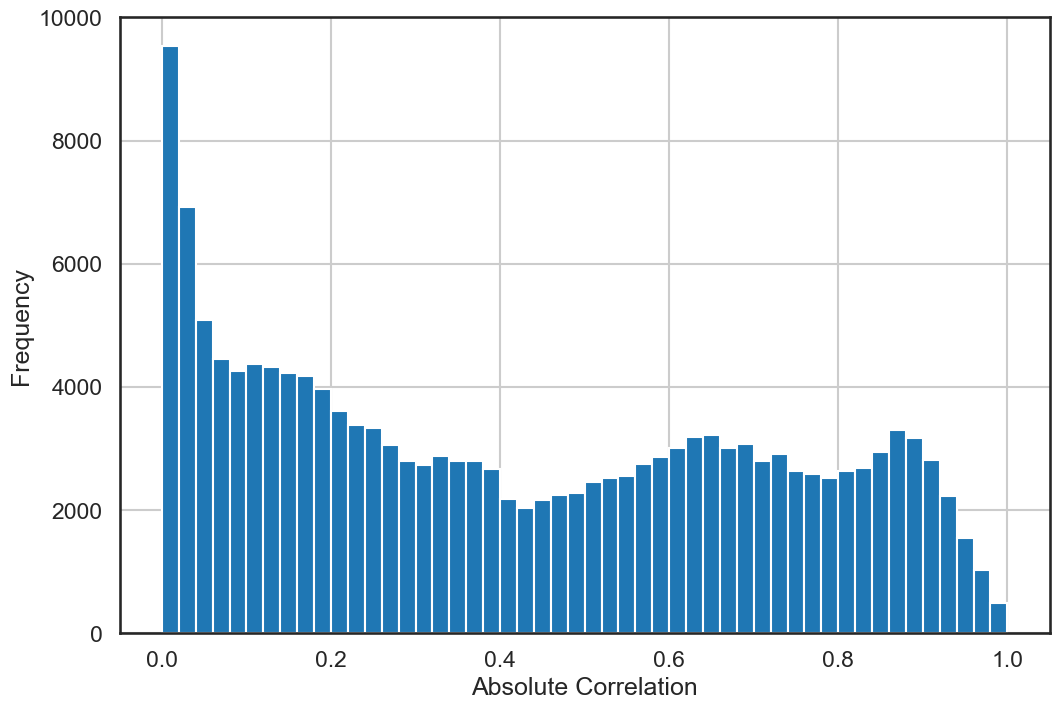

In [48]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize = (12,8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [49]:
# the most highly coreelated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation > 0.8')


feature1  ... abs_correlation
156894  fBodyBodyGyroJerkMag-mean()  ...        1.000000
93902             tBodyAccMag-sma()  ...        1.000000
101139       tBodyAccJerkMag-mean()  ...        1.000000
96706         tGravityAccMag-mean()  ...        1.000000
94257          tBodyAccMag-energy()  ...        1.000000
...                             ...  ...             ...
22657          tGravityAcc-mean()-Y  ...        0.993425
39225     tGravityAcc-arCoeff()-Z,3  ...        0.994267
38739     tGravityAcc-arCoeff()-Z,2  ...        0.994628
23176          tGravityAcc-mean()-Z  ...        0.994764
38252     tGravityAcc-arCoeff()-Z,1  ...        0.995195

[22815 rows x 4 columns]

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[features_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, features_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, features_cols]
y_test  = data.loc[test_idx, 'Activity']

In [62]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [63]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [64]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [57]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [65]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

* Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [66]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                      ...        l2                    
            0         1         2  ...         3         4         5
54   0.098424  0.747069 -0.661339  ...  0.155286  0.389280 -0.619885
474 -0.024542 -0.060490  0.201884  ...  2.160367 -0.622430 -0.029659
2    0.030187  0.063196  0.245909  ...  0.146540  0.007003 -0.961425
541 -0.013497 -0.067763  0.208686  ... -0.569812  0.378065 -0.570468
146  0.057569  0.736933 -0.417105  ...  0.091296  0.252554  0.056375
180 -0.024143 -0.073827  0.035692  ...  0.297891  0.491435 -1.086988
360 -0.026031  0.091810  0.030077  ...  0.434384 -0.080537 -0.568222
261 -0.029785  0.035091 -0.119532  ... -2.257832  0.226972  0.817042
16   0.024852 -0.086043 -0.022885  ... -1.479350  0.212575 -0.488001
358 -0.009148  0.364942  0.021131  ... -0.889031  0.083671  1.057173

[10 rows x 18 columns]

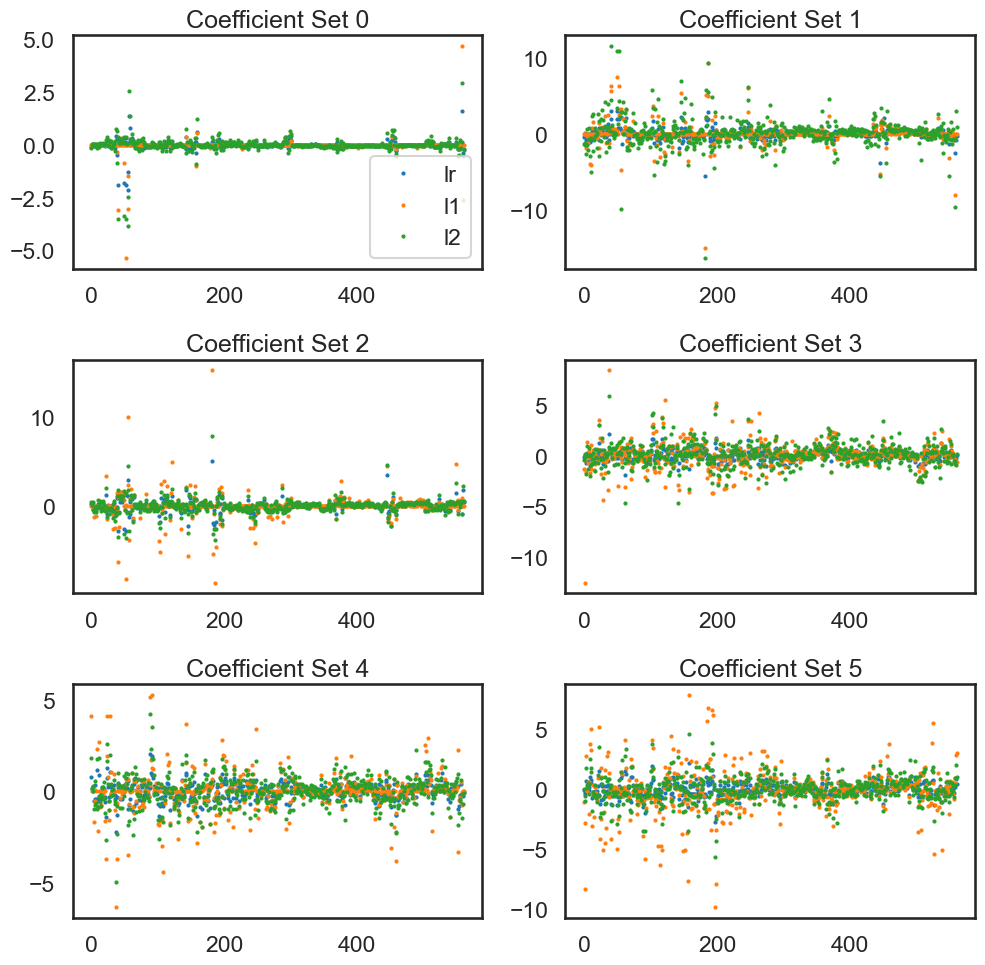

In [68]:
# Prepare six separate plots for each of the multi-class coefficients.

fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

* Predict and store the class for each model.
* Store the probability for the predicted class for each model.

In [69]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

lr  l1  l2
0   3   3   3
1   5   5   5
2   3   3   3
3   1   1   1
4   0   0   0

In [70]:
y_prob.head()

lr        l1        l2
0  0.998939  0.998935  0.999757
1  0.988125  0.999656  0.999490
2  0.987576  0.995414  0.999658
3  0.981381  0.999171  0.994330
4  0.998277  0.999923  0.999997

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [71]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [72]:
metrics

lr        l1        l2
precision  0.984144  0.983835  0.983824
recall     0.984142  0.983819  0.983819
fscore     0.984143  0.983815  0.983819
accuracy   0.984142  0.983819  0.983819
auc        0.990384  0.990144  0.990165

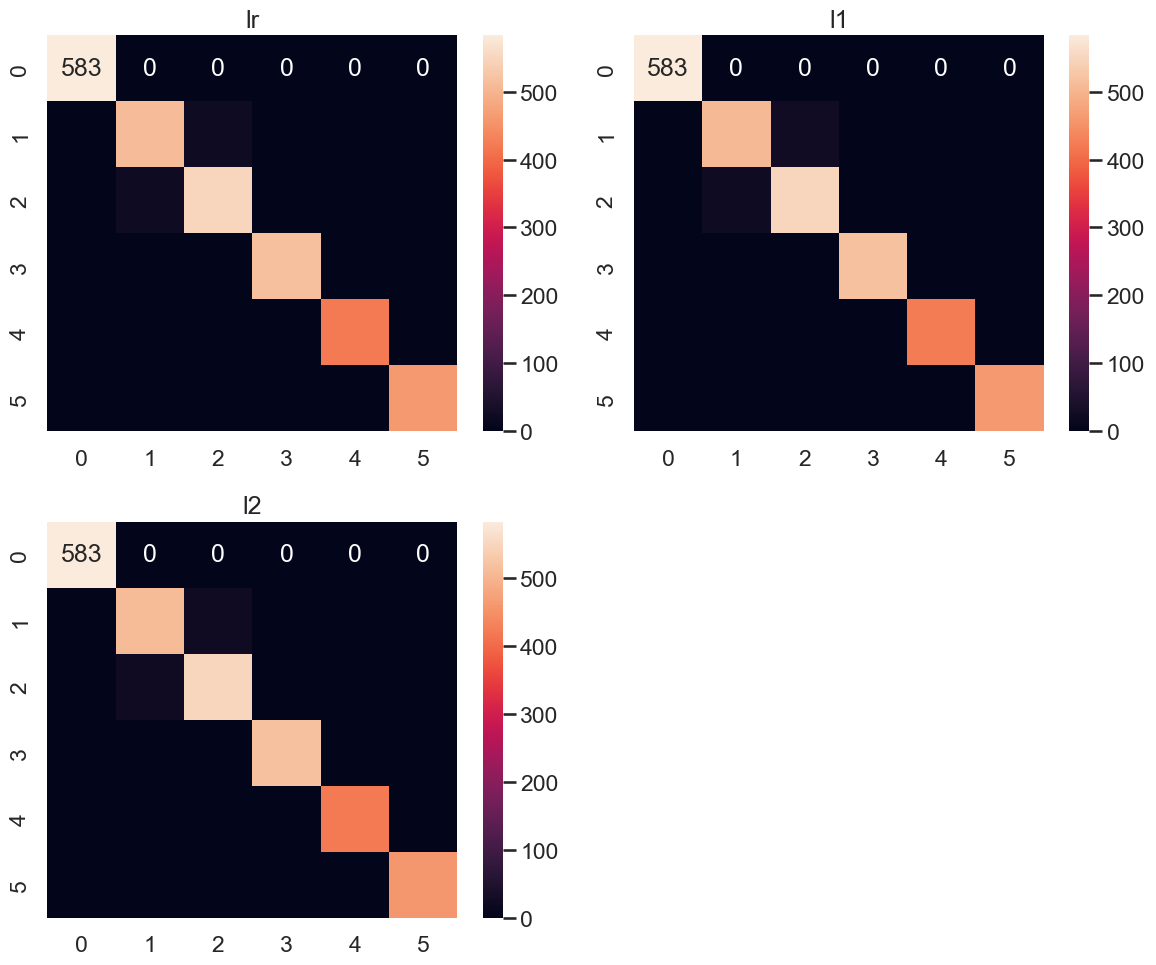

In [73]:
# Display or plot the confusion matrix for each model.

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()